# Función para balancear un conjunto de datos con clases desbalanceadas.

Se generan datos sinteticos para aquellas clases con una escacez de información en relación a la cantidad de registros.

Desarrollado por Karla Inostroza



## Por confidencialidad de herramientas de la empresa Morris & Opazo se suprimira el codigo con la función para balancear las clases

# Aplicación de la funcion

### Vamos a poner en practica la función definida tanto para conjunto de datos con clases binarios como para conjunto de datos con multiclase. Para ello se requiere que la relación entre una clase y otra sea lo sificientemente grande, es decir el resultado de la disivión entre la cantidad de registros de una clase y otra debe estar sobre un numero. Segun Google desarrollador, para un conjunto con clases binarias, una proporción entre el 80%-20% y 60%-40%, donde el primer porcentaje es para la clase mayoritaria y el segun para la minoritaria, representa un desbalanceo leve. Por lo tanto una relación de 0.5 entre las clases sera mas que suficiente en estos estudios [2].

#### I) Conjunto de Datos con clase binarias

En primer lugar utilizaremos un conjunto de datos referente al problema de fraude en un servicio basico, donde existe un gran desbalanceo entre las dos clases existente (cliente fraudutenlo y no fraudulento). Para corroborrar que nuestro balanceo de clases se realizo de manera eficiente debemos tener numeros estadisticos similares como la media en caracteristicas numerica para asi demostras que la distribución de datos no cambio. Además algunos graficos con la misma intensión


el conjunto de datos cargado contiene los conjuntos fusionados

In [20]:
#Cargar la base de datos 
df = pd.read_csv('conjunto_fraudes.csv', error_bad_lines=False)
#Variable categorica ordinal, cambiamos el tipo de dato ya que al tener numeros se guarda como entero.
df['feature_5']=df['feature_5'].astype(object)


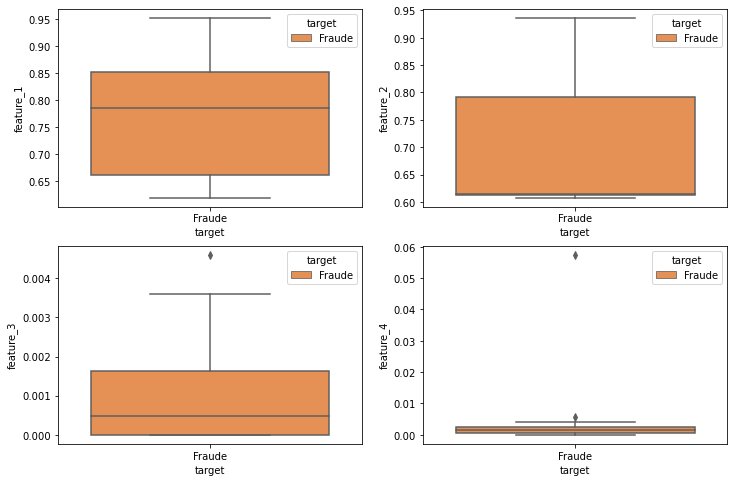

In [139]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(y='feature_1',x = 'target', hue = 'target', palette = 'Oranges', data = df[df['target'] == 'Fraude'], ax=axarr[0][0])
sns.boxplot(y='feature_2',x = 'target', hue = 'target', palette = 'Oranges', data = df[df['target'] == 'Fraude'], ax=axarr[0][1])
sns.boxplot(y='feature_3',x = 'target', hue = 'target', palette = 'Oranges', data = df[df['target'] == 'Fraude'], ax=axarr[1][0])
sns.boxplot(y='feature_4',x = 'target', hue = 'target', palette = 'Oranges', data = df[df['target'] == 'Fraude'], ax=axarr[1][1])

In [ ]:
minVec = df[['feature_1', 'feature_2', 'feature_3', 'feature_4']].min().copy()
maxVec = df[['feature_1', 'feature_2', 'feature_3', 'feature_4']].max().copy()
df[['feature_1', 'feature_2', 'feature_3', 'feature_4']] = (df[['feature_1', 'feature_2', 'feature_3', 'feature_4']]-minVec)/(maxVec-minVec)

Ahora apliquemos la función definida.

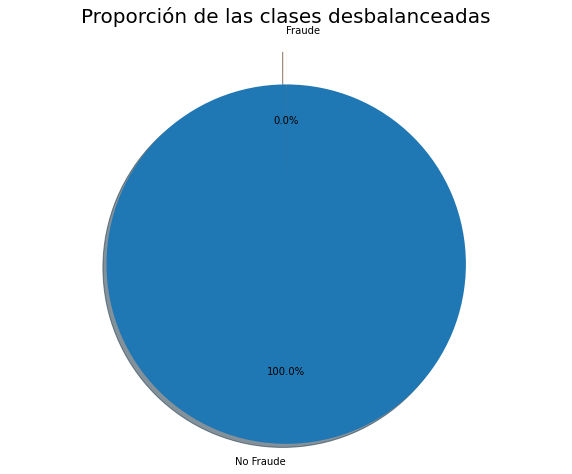

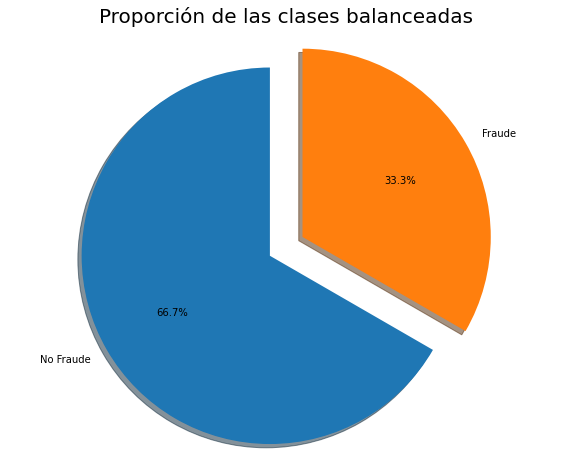

In [32]:
[X_balanced, y_balanced]= balanced(df, 'target')

In [37]:
#Veamos un resumen descriptivo de la Data original y desbalanceada
round(df[['feature_1', 'feature_2', 'feature_3', 'feature_4']].describe(),3)

,feature_1,feature_2,feature_3,feature_4
count,736771.000,736771.000,736771.000,736771.000
mean,0.512,0.690,0.002,0.003
std,0.293,0.196,0.012,0.014
min,0.000,0.000,0.000,0.000
25%,0.262,0.613,0.001,0.001
50%,0.524,0.616,0.002,0.002
75%,0.774,0.902,0.002,0.003
max,1.000,1.000,1.000,1.000


In [39]:
round(X_balanced[['feature_1', 'feature_2', 'feature_3', 'feature_4']].describe(),3)

,feature_1,feature_2,feature_3,feature_4
count,1105098.000,1105098.000,1105098.000,1105098.000
mean,0.594,0.688,0.002,0.003
std,0.270,0.173,0.010,0.012
min,0.000,0.000,0.000,0.000
25%,0.393,0.613,0.000,0.001
50%,0.667,0.616,0.001,0.002
75%,0.798,0.847,0.002,0.003
max,1.000,1.000,1.000,1.000


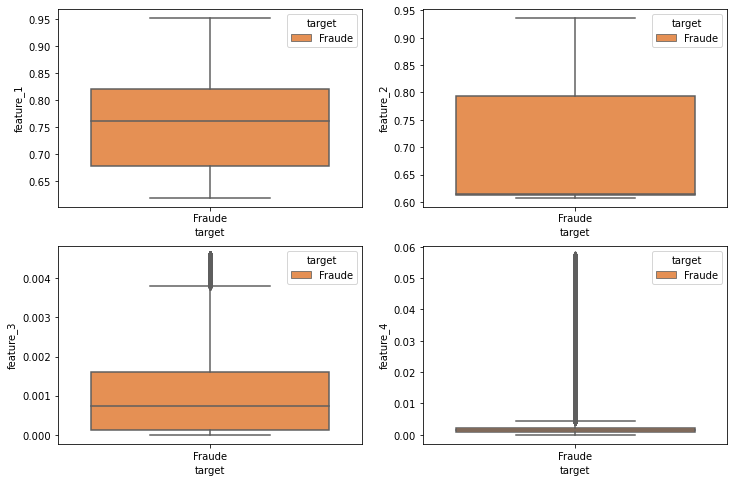

In [140]:
df_balanced = pd.concat([X_balanced, y_balanced], axis=1)
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(y='feature_1',x = 'target', hue = 'target', palette = 'Oranges' ,data = df_balanced[df_balanced['target'] == 'Fraude'], ax=axarr[0][0])
sns.boxplot(y='feature_2',x = 'target', hue = 'target', palette = 'Oranges' ,data = df_balanced[df_balanced['target'] == 'Fraude'], ax=axarr[0][1])
sns.boxplot(y='feature_3',x = 'target', hue = 'target', palette = 'Oranges' ,data = df_balanced[df_balanced['target'] == 'Fraude'], ax=axarr[1][0])
sns.boxplot(y='feature_4',x = 'target', hue = 'target', palette = 'Oranges' ,data = df_balanced[df_balanced['target'] == 'Fraude'], ax=axarr[1][1])

In [109]:
name_chateracter_value = list(set(df_balanced.target))
colores = ['blue', 'red']
dic_color_grafic = dict(zip(name_chateracter_value, colores))
name_target = ['No Fraude', 'Fraude']

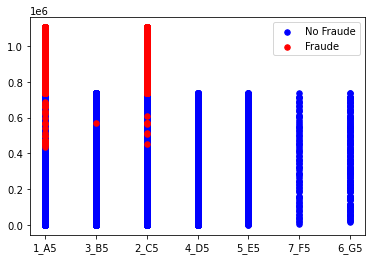

In [110]:
fig1, ax1 = plt.subplots()

for i in name_target:
    ax1.scatter(
        df_balanced.feature_5[df_balanced.target == i],
        df_balanced.index[df_balanced.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

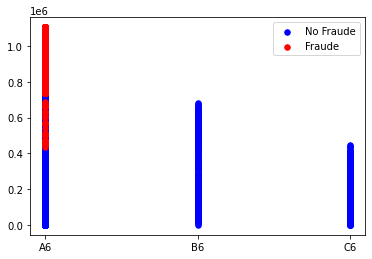

In [112]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced.feature_6[df_balanced.target == i],
        df_balanced.index[df_balanced.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

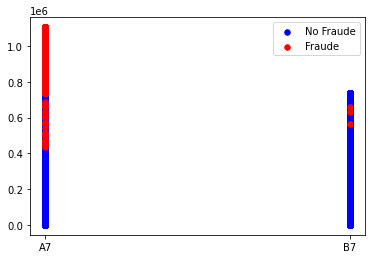

In [113]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced.feature_7[df_balanced.target == i],
        df_balanced.index[df_balanced.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

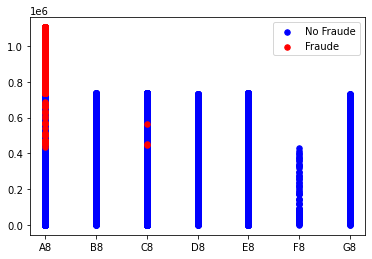

In [114]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced.feature_8[df_balanced.target == i],
        df_balanced.index[df_balanced.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

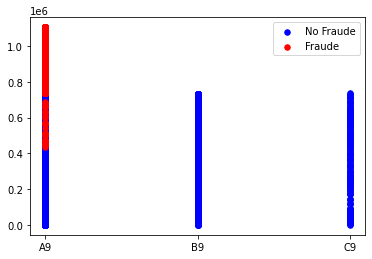

In [115]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced.feature_9[df_balanced.target == i],
        df_balanced.index[df_balanced.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

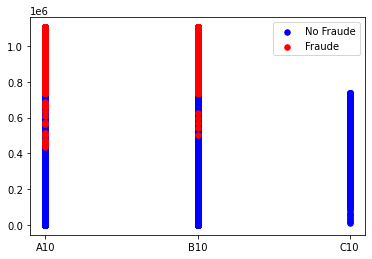

In [116]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced.feature_10[df_balanced.target == i],
        df_balanced.index[df_balanced.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

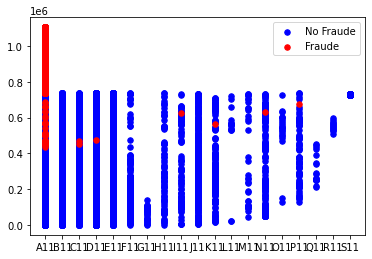

In [117]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced.feature_11[df_balanced.target == i],
        df_balanced.index[df_balanced.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

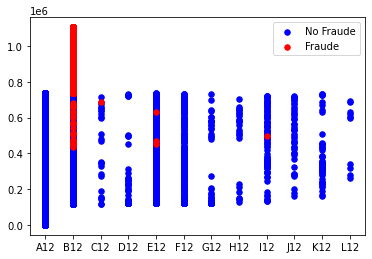

In [118]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced.feature_12[df_balanced.target == i],
        df_balanced.index[df_balanced.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

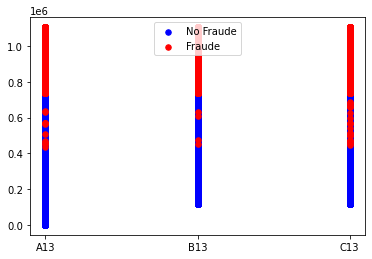

In [119]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced.feature_13[df_balanced.target == i],
        df_balanced.index[df_balanced.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

### II. Conjunto de dato multiclase

En este caso utilizaremos un conjunto de datos que describe la clasificación de proteinas E-coli utilizando la secuencia de aminoacidos en sus sitios de localización celular. En otra palabras, nos dice como se va a unir una proteina a una celular segun la composición de la proteína antes de desplegarse. En la primera columna tenemos el nombre de la secuencia que representa el número de acceso a la base de datos SWISS-PROT. Las siguientes columnas se describen a continuación. [3]

- mcg: Método de McGeoch para el reconocimiento de secuencias de señales.
- gvh: método de von Heijne para el reconocimiento de la secuencia señal.
- lip: puntuación de la secuencia consenso de la Peptidasa Señal II de von Heijne.
- chg: Presencia de carga en el N-terminal de las lipoproteínas predichas.
- aac: puntuación del análisis discriminante del contenido de aminoácidos de proteínas de la membrana externa y periplásmica.
- alm1: puntuación del programa de predicción de regiones de membrana ALOM.
- alm2: puntuación del programa ALOM después de excluir las regiones de señal de la secuencia.

La ultima colunma nos dice la clase perteneciente segun la clasificación realizada a cada uno de los registros de proteinas, estas se clasifican de la siguiente manera. [4]

- cp: citoplasma
- im: membrana interna sin secuencia de señal             
- pp: perisplasma
- imU: membrana interna, secuencia de señal no salvable
- om: membrana externa
- omL: lipoproteína de la membrana externa
- imL: lipoproteína de la membrana interna
- imS: membrana interna, secuencia de señalización escindible


In [120]:
df_ecoli = pd.read_csv('ecoli.csv', error_bad_lines=False, names = ['Nombre', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'clases'])

In [122]:
[X_balanced_ecoli, y_balanced_ecoli]= balanced(df_ecoli, 'clases')

InputError: the records in the class imS do not have enough neighbors as indicated. 

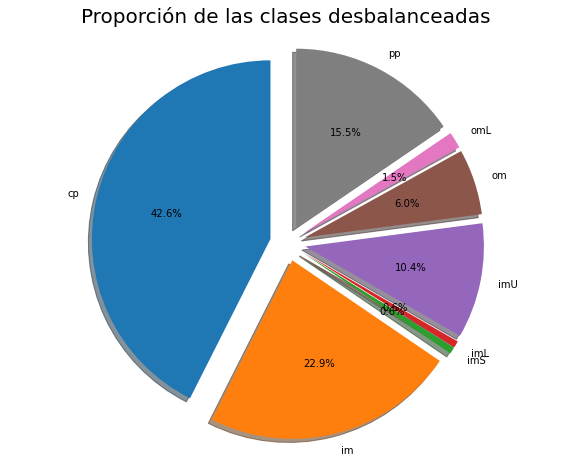

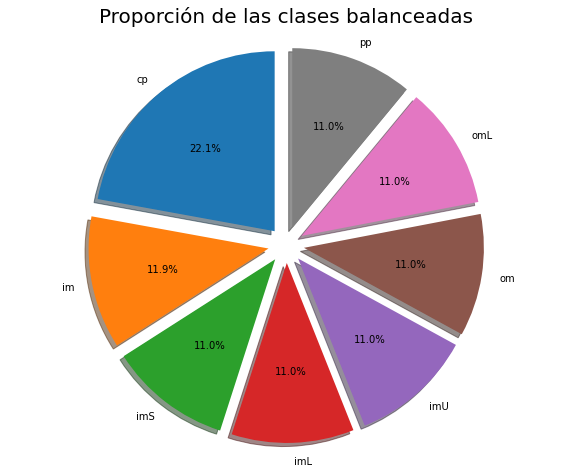

In [124]:
[X_balanced_ecoli, y_balanced_ecoli]= balanced(df_ecoli, 'clases', k=1)

In [125]:
df_balanced_ecoli= pd.concat([X_balanced_ecoli, y_balanced_ecoli], axis = 1)

In [129]:
round(df_ecoli.describe(),3)

,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000,336.000,336.000,336.000,336.000,336.000,336.000
mean,0.500,0.500,0.495,0.501,0.500,0.500,0.500
std,0.195,0.148,0.088,0.027,0.122,0.216,0.209
min,0.000,0.160,0.480,0.500,0.000,0.030,0.000
25%,0.340,0.400,0.480,0.500,0.420,0.330,0.350
50%,0.500,0.470,0.480,0.500,0.495,0.455,0.430
75%,0.662,0.570,0.480,0.500,0.570,0.710,0.710
max,0.890,1.000,1.000,1.000,0.880,1.000,0.990


In [128]:
round(df_balanced_ecoli.describe(), 3) 

,mcg,gvh,lip,chg,aac,alm1,alm2
count,646.000,646.000,646.000,646.000,646.000,646.000,646.000
mean,0.601,0.520,0.598,0.531,0.529,0.541,0.479
std,0.181,0.133,0.217,0.100,0.121,0.179,0.202
min,0.000,0.160,0.480,0.500,0.000,0.030,0.000
25%,0.490,0.440,0.480,0.500,0.448,0.400,0.323
50%,0.670,0.501,0.480,0.500,0.530,0.557,0.425
75%,0.727,0.560,0.480,0.500,0.590,0.680,0.661
max,0.890,1.000,1.000,1.000,0.880,1.000,0.990


# *Conjunto de fraude con caracteristicas numericas*

In [130]:
df_continuos= df.drop(columns = ['feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13'], axis=1)

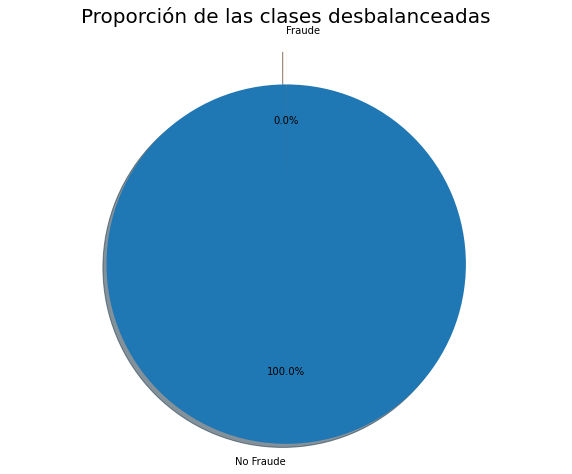

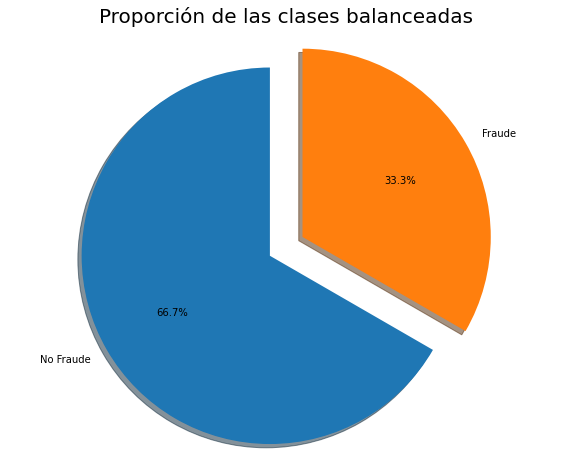

In [142]:
[X_balanced_continuos, y_balanced_continuos]= balanced(df_continuos, 'target')

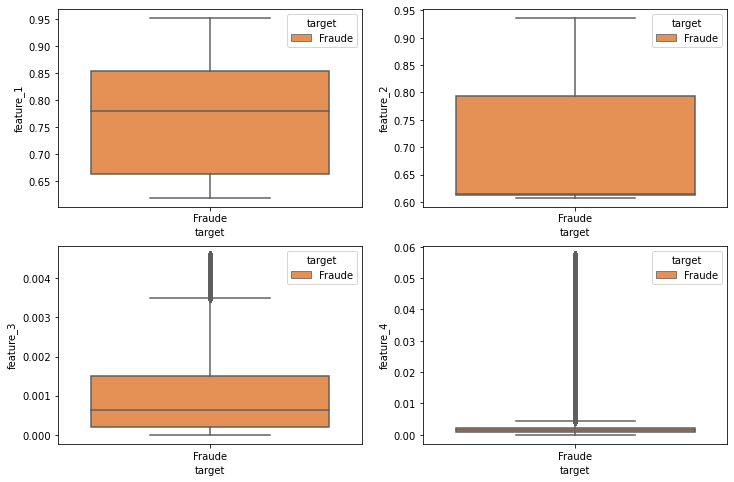

In [143]:
df_balanced_continuos= pd.concat([X_balanced_continuos, y_balanced_continuos], axis = 1)
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(y='feature_1',x = 'target', hue = 'target', palette = 'Oranges' ,data = df_balanced_continuos[df_balanced_continuos['target'] == 'Fraude'], ax=axarr[0][0])
sns.boxplot(y='feature_2',x = 'target', hue = 'target', palette = 'Oranges' ,data = df_balanced_continuos[df_balanced_continuos['target'] == 'Fraude'], ax=axarr[0][1])
sns.boxplot(y='feature_3',x = 'target', hue = 'target', palette = 'Oranges' ,data = df_balanced_continuos[df_balanced_continuos['target'] == 'Fraude'], ax=axarr[1][0])
sns.boxplot(y='feature_4',x = 'target', hue = 'target', palette = 'Oranges' ,data = df_balanced_continuos[df_balanced_continuos['target'] == 'Fraude'], ax=axarr[1][1])

In [144]:
round(df_balanced_continuos.describe(),3)

,feature_1,feature_2,feature_3,feature_4
count,1105098.000,1105098.000,1105098.000,1105098.000
mean,0.595,0.687,0.002,0.003
std,0.272,0.172,0.010,0.012
min,0.000,0.000,0.000,0.000
25%,0.393,0.613,0.000,0.001
50%,0.657,0.616,0.001,0.002
75%,0.810,0.846,0.002,0.003
max,1.000,1.000,1.000,1.000


# *Conjunto de fraude con caracteristicas categoricas*

In [145]:
df_nominal= df.drop(columns = ['feature_1', 'feature_2', 'feature_3', 'feature_4'], axis=1)

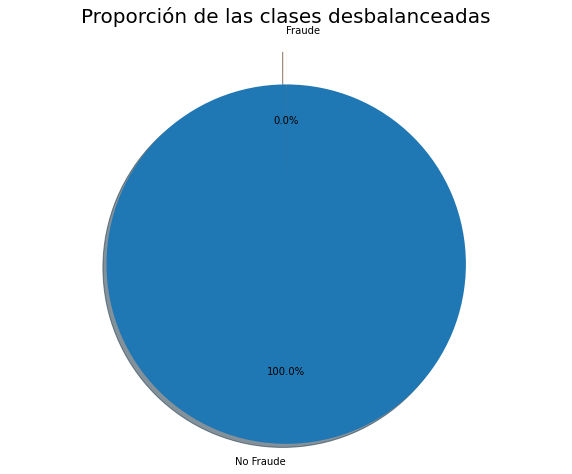

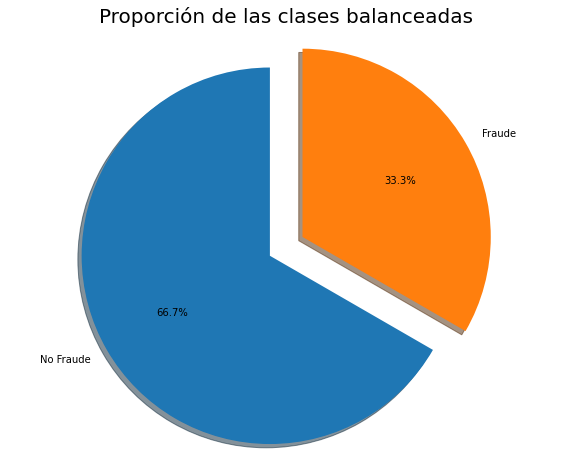

In [146]:
[X_balanced_nominal, y_balanced_nominal]= balanced(df_nominal, 'target')

In [147]:
df_balanced_nominal= pd.concat([X_balanced_nominal, y_balanced_nominal], axis = 1)

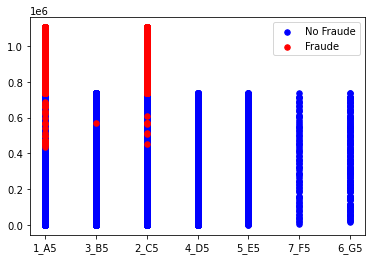

In [148]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced_nominal.feature_5[df_balanced_nominal.target == i],
        df_balanced_nominal.index[df_balanced_nominal.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

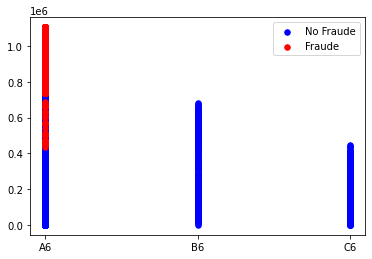

In [149]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced_nominal.feature_6[df_balanced_nominal.target == i],
        df_balanced_nominal.index[df_balanced_nominal.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

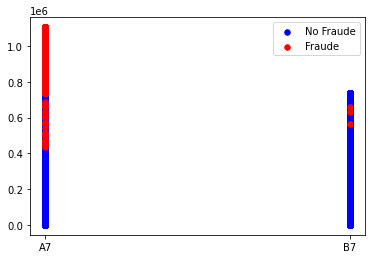

In [150]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced_nominal.feature_7[df_balanced_nominal.target == i],
        df_balanced_nominal.index[df_balanced_nominal.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

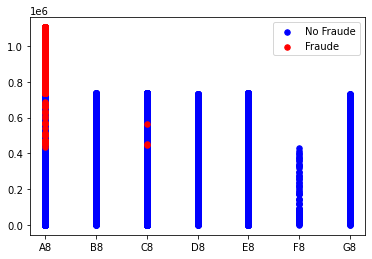

In [151]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced_nominal.feature_8[df_balanced_nominal.target == i],
        df_balanced_nominal.index[df_balanced_nominal.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

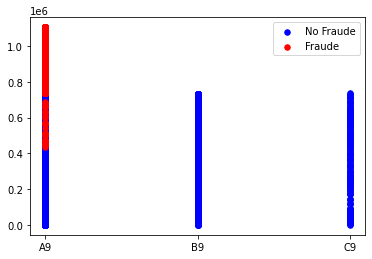

In [152]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced_nominal.feature_9[df_balanced_nominal.target == i],
        df_balanced_nominal.index[df_balanced_nominal.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

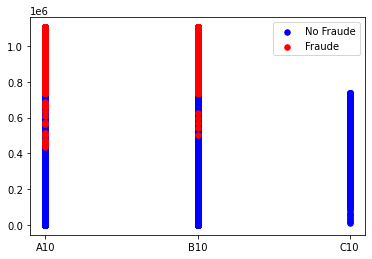

In [153]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced_nominal.feature_10[df_balanced_nominal.target == i],
        df_balanced_nominal.index[df_balanced_nominal.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

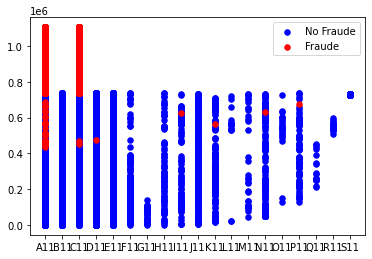

In [154]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced_nominal.feature_11[df_balanced_nominal.target == i],
        df_balanced_nominal.index[df_balanced_nominal.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

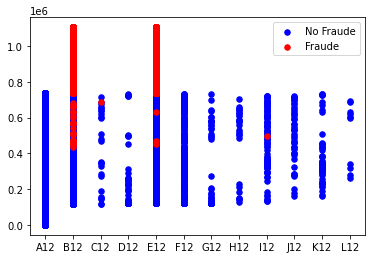

In [155]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced_nominal.feature_12[df_balanced_nominal.target == i],
        df_balanced_nominal.index[df_balanced_nominal.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

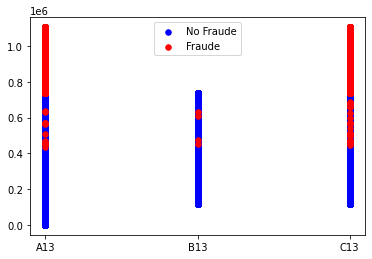

In [156]:
fig1, ax1 = plt.subplots()
for i in name_target:
    ax1.scatter(
        df_balanced_nominal.feature_13[df_balanced_nominal.target == i],
        df_balanced_nominal.index[df_balanced_nominal.target == i],
        s = 30,
        c = dic_color_grafic[i],
        label = i)
plt.legend()
plt.show()

# Referencias

[1]


In [ ]:
@article{ JMLR:v18:16-365,
author  = {Guillaume  Lema{{\^i}}tre and Fernando Nogueira and Christos K. Aridas},
title   = {Imbalanced-learn: A Python Toolbox to Tackle the Curse of Imbalanced Datasets in Machine Learning},
journal = {Journal of Machine Learning Research},
year    = {2017},
volume  = {18},
number  = {17},
pages   = {1-5},
url     = {http://jmlr.org/papers/v18/16-365.html}
}

[2] https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

[3] https://machinelearningmastery.com/imbalanced-multiclass-classification-with-the-e-coli-dataset/

[4] https://archive.ics.uci.edu/ml/datasets/ecoli